In [1]:
import pandas as pd #ИМПОРТИРУЕМ ПАНДАС
import pandahouse as ph #ИМПОРТИРУЕМ ПАНДАХАУС ДЛЯ КОННЕКТА С КЛИКХАУСОМ

In [100]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080', #СОЗДАЁМ ПЕРЕМЕННУЮ И ПИШЕМ ТУДА ДАННЫЕ ДЛЯ ВХОДА В КЛИКХАУС
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [3]:
# ПИШЕМ ЗАПРОС, КОТОРЫЙ ПЕРЕДАСТСЯ В КЛИКХАУС
cd = """            
SELECT count()
FROM ldn_listings
limit 10
"""
df = ph.read_clickhouse(cd, connection=connection_default) #ЧИТАЕМ ЧЕРЕЗ ФУНКЦИЮ PH_CLICKHOUSE И ПЕРЕДАЁМ ПЕРЕМЕННУЮ И ТО
                                                           #КАК УСТАНАВЛИВАЕМ КОННЕКТ С КЛИКХАУСОМ, СОЗДАВАЯ ЦЕПОЧКУ
df

,count()
0,85207


                                                       ЗАДАНИЕ 2

Выгрузите из таблицы данные о цене в зависимости от типа жилья. Необходимые столбцы:

price – цена за ночь
room_type – тип сдаваемого жилья (доступные варианты: Entire home/apt, Private room, Hotel room, Shared room)
Ограничение поставьте на 1000 строк. Результат должен быть отсортирован по возрастанию id.

Пример результирующей таблицы:

+-----------------+------------+
| room_type       | price      |
+-----------------+------------+
| Private room    |         65 | 
| Entire home/apt |        100 | 
+-----------------+------------+
Hint: replaceRegexpAll(столбец, что_заменить, на_что_заменить) – паттерн [$,] чтобы избавиться от $ и запятых; toFloat32OrNull(столбец)

Сгруппируйте полученный датафрейм по типу жилья и посчитайте 75-й перцентиль цены.

В качестве ответа впишите полученное значение 75 перцентиля цены для комнат типа Private room.

In [31]:
q = """ 
SELECT
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) as price
FROM ldn_listings
ORDER BY id
LIMIT 1000
"""
#Сначала написали запрос для sql который выше, где именили тип string на float, а потом заменили знаки $ на пустоту

df = ph.read_clickhouse(q, connection=connection_default)
df

,room_type,price
0,Private room,65.0
1,Entire home/apt,100.0
2,Entire home/apt,300.0
3,Private room,150.0
4,Entire home/apt,65.0
...,...,...
995,Entire home/apt,110.0
996,Entire home/apt,110.0
997,Private room,65.0
998,Entire home/apt,100.0


In [39]:
df.groupby(['room_type'])['price'].quantile(0.75)

# Сначала обращаемся к датафрейу и группируем по заданию по типу отеля room type, далее ищем по price квантиль


room_type
Entire home/apt    160.00
Hotel room         157.00
Private room        70.00
Shared room         69.25
Name: price, dtype: float64

                                                    ЗАДАНИЕ 3

In [64]:
import pandas as pd #ИМПОРТИРУЕМ ПАНДАС
import pandahouse as ph #ИМПОРТИРУЕМ ПАНДАХАУС ДЛЯ КОННЕКТА С КЛИКХАУСОМ
import seaborn as sns
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [92]:
q = """ 
SELECT
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) as price,
    toFloat32OrNull(review_scores_rating) as review_scores_rating
FROM ldn_listings
where review_scores_rating is not null
ORDER BY id
LIMIT 1000
"""
#Сначала написали запрос для sql который выше, где именили тип string на float, а потом заменили знаки $ на пустоту

df = ph.read_clickhouse(q, connection=connection_default)
df

,room_type,price,review_scores_rating
0,Private room,65.0,97.0
1,Entire home/apt,100.0,96.0
2,Entire home/apt,300.0,94.0
3,Entire home/apt,65.0,93.0
4,Private room,29.0,96.0
...,...,...,...
995,Entire home/apt,165.0,100.0
996,Private room,99.0,93.0
997,Private room,45.0,100.0
998,Private room,20.0,88.0


In [95]:
df_1 = df.groupby(['room_type'], as_index=False) \
    .agg({'review_scores_rating': 'mean',
          'price': 'mean'})
df_1
# санчала создали переменную, в которую запишем группировку по типу комнаты room_type
# после чего установаим индексацию на выкл, что бы отображение было корректным
# после чего сагрегируем и посчитаем среднее по двум колонкам, для этого в агрегацию
# передадим два значения, и оба посчитаем по среднму

,room_type,review_scores_rating,price
0,Entire home/apt,93.568787,135.882950
1,Hotel room,92.500000,134.000000
2,Private room,94.766205,54.642437
3,Shared room,90.000000,21.000000


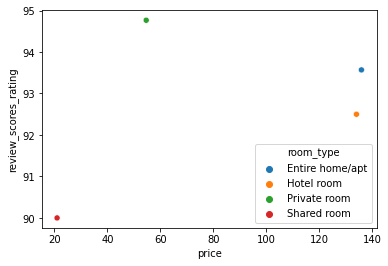

In [96]:
sns.scatterplot(data=df_1, x="price", y="review_scores_rating", hue="room_type")

# здесь сначала пропишем саму функцию, обозначив что собираемя строить плот
# после чего передадим в data то, по какой переменной строим, а далее оозначим оси
# в них передадим колонки
# в hue передадим параметр ruum_type,  это будет разбивка по значениям

                                                        ЗАДАНИЕ 4

In [136]:
query = """
SELECT
    DISTINCT host_id,
             host_verifications
FROM ldn_listings
WHERE experiences_offered != 'none'
"""

df = ph.read_clickhouse(query, connection=connection_default)
df

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [137]:
df.host_verifications = df.host_verifications.apply(lambda x: x.strip('[]').split(', '))
# для начала обратимся к датафрейму df, а потом к колонке host_verifications, после чего
# воспользуемся функцией .apply которая поможет выполнить или адаптировать функцию в функции
# после чего в скобки мы передаём то, что мы хотели
# после чего с помощью команды strip( ) удалим из колонки все знаки, которые встреаются с []
# далее с помощью команды split(', ') разделим строку по переданому разделителю, будем делить по запятой
# далее воспользуемся командой replace()
# После чего мы знаем, что после применяемых нами функций это уже будет массив строк

In [138]:
df.explode('host_verifications').host_verifications.value_counts()

# Далее воспользуемся функцией explode() который разобъёт наш датафрейм по отдельным строкам
# далее передадим туда нашу колонку host_verifications, показав что разбивка нужна по этой колонке
# после чего обратмся снова к колонке, точнее мы обратимся уже к новой колонке host_verifications
# и воспользуемся .value_counts() которая вернёт результат отсортированный в порядке убывания

'phone'                    1361
'email'                    1345
'reviews'                  1309
'government_id'            1196
'jumio'                    1115
'offline_government_id'     469
'work_email'                279
'facebook'                  270
'selfie'                    252
'identity_manual'           227
'manual_offline'             70
'google'                     34
'kba'                        27
'manual_online'              16
'sent_id'                     6
Name: host_verifications, dtype: int64